<a href="https://colab.research.google.com/github/Ali-Alameer/Deep-Learning/blob/main/week2_complex_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's build the Logistic Regression model from scratch

In [1]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize parameters
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent optimization
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


The LogisticRegression class is defined to encapsulate the functionality of the logistic regression model.

The constructor (__init__) initializes the learning rate and the number of iterations for gradient descent. It also initializes the weights and bias as None.

The fit method takes input features X and corresponding labels y as arguments and performs the training of the logistic regression model. It initialises the weights and bias, and then performs gradient descent for the specified number of iterations. The model's weights and bias are updated iteratively using the gradient of the loss function.

The predict method takes input features X and returns the predicted labels using the learned weights and bias. It calculates the linear model by taking the dot product of the input features and the weights, adds the bias term, and applies the sigmoid function to obtain the predicted probabilities. The predicted probabilities are then converted to binary labels by using a threshold of 0.5.

The _sigmoid method is a helper function that applies the sigmoid function element-wise to a given input.

-- General info

In Python, methods or functions that have an underscore _ in their name are often used to indicate that they are intended for internal or private use within a class or module.

Also, a class is a blueprint or template that defines the properties (attributes) and behaviours (methods) of objects. It provides a way to create user-defined data types with their own characteristics and functionality.


Furthermore, self is a conventionally used parameter name that refers to the instance of a class. It is a special variable that allows access to the attributes and methods of the class within its own methods. When defining methods within a class, the first parameter of the method is typically self, although you can choose any valid parameter name. The self parameter acts as a reference to the instance of the class.

The __init__ method in Python is a special method, also known as the constructor. It is automatically called when an instance of a class is created. The primary purpose of the __init__ method is to initialize the attributes of the object with the values passed during the object's creation.


You can create an instance of the LogisticRegression class and use it to train and predict on your dataset by following these steps:

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the digits dataset
digits = load_digits()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of Logistic Regression
model = LogisticRegression(learning_rate=0.0001, num_iterations=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
# The results are not so good ! Think why !

Accuracy: 0.125
Confusion Matrix:
[[25  8  0  0  0  0  0  0  0  0]
 [ 8 20  0  0  0  0  0  0  0  0]
 [25  8  0  0  0  0  0  0  0  0]
 [ 1 33  0  0  0  0  0  0  0  0]
 [12 34  0  0  0  0  0  0  0  0]
 [ 1 46  0  0  0  0  0  0  0  0]
 [ 5 30  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]]


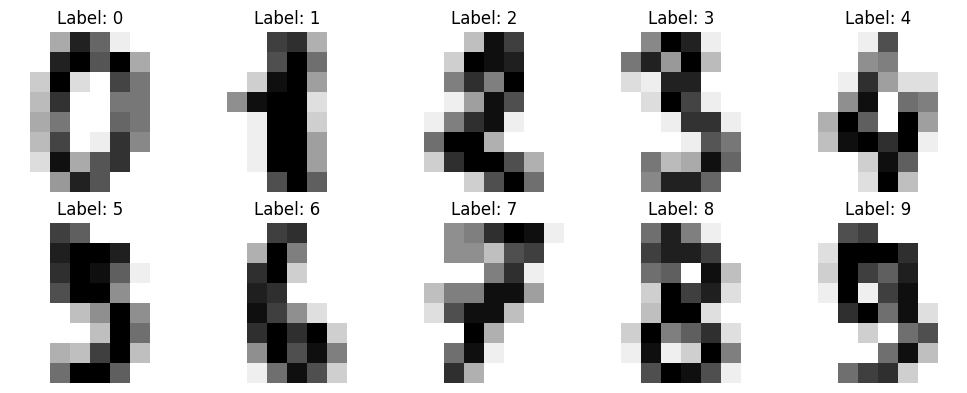

In [3]:
import matplotlib.pyplot as plt

# Visualize the digit input data
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[i].reshape(8, 8), cmap='binary')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Maybe let's choose an easier dataset !

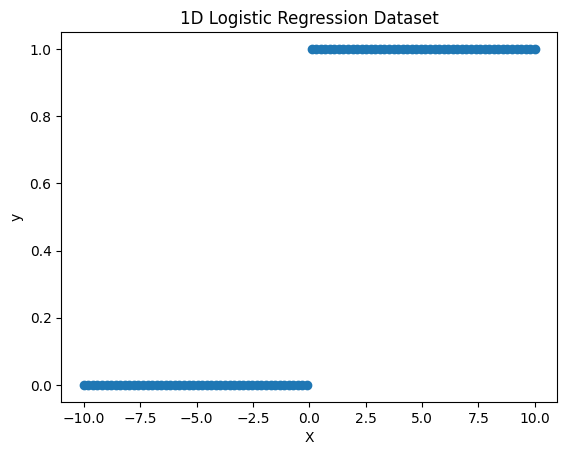

In [4]:
# Generate synthetic dataset
np.random.seed(0)
X = np.linspace(-10, 10, num=100)
y = np.where(X < 0, 0, 1)

# Plot the dataset
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('1D Logistic Regression Dataset')
plt.show()

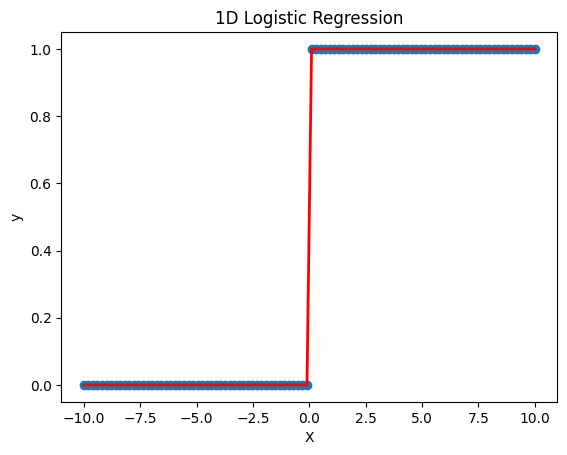

In [5]:
# Reshape the features to match the expected format
X = X.reshape(-1, 1)

# Create an instance of Logistic Regression
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# Train the model
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Plot the decision boundary
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('1D Logistic Regression')
plt.show()

In [6]:
# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
confusion_mat = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 50]]
